# **Importing the necessary libraries**

In [ ]:
import requests
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats

#**Fetched Data from API**
We are using the Open Weather Map API to fetch weather data for the different cities and using for loop to extracting weather data for different cities.

In [ ]:

cities = [
    'Agra',
    'Ahmedabad',
    'Aligarh',
    'Allahabad',
    'Alwar',
    'Amritsar',
    'Bengaluru',
    'Bhavnagar',
    'Bhopal',
    'Bhubaneswar',
    'Bhuj',
    'Chandigarh',
    'Chennai']
api_key = "Your api key"
headers= {
    'X-RapidAPI-Key': api_key,
    'X-RapidAPI-Host': 'open-weather13.p.rapidapi.com'
  }
response_array = []
for city in cities:
    url =  f'https://open-weather13.p.rapidapi.com/city/{city}'
    response = requests.get(url, headers=headers)
    data = response.json()
    response_array.append(data)
response_array

[{'message': 'You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/worldapi/api/open-weather13'},
 {'message': 'You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/worldapi/api/open-weather13'},
 {'message': 'You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/worldapi/api/open-weather13'},
 {'message': 'You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/worldapi/api/open-weather13'},
 {'message': 'You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/worldapi/api/open-weather13'},
 {'message': 'You have exceeded the MONTHLY quota for Requests on your current plan, BASIC. Upgrade your plan at https://rapidapi.com/worldapi/api/open-weather13'},
 {'message

Now saving the extracting data in a variable 'new_data'

In [ ]:
new_data =[{'coord': {'lon': 78.0167, 'lat': 27.1833},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 89.96,
   'feels_like': 102.56,
   'temp_min': 89.96,
   'temp_max': 89.96,
   'pressure': 1000,
   'humidity': 67,
   'sea_level': 1000,
   'grnd_level': 981},
  'visibility': 10000,
  'wind': {'speed': 11.27, 'deg': 255, 'gust': 15.46},
  'clouds': {'all': 100},
  'dt': 1691233213,
  'sys': {'country': 'IN', 'sunrise': 1691194417, 'sunset': 1691242460},
  'timezone': 19800,
  'id': 1279259,
  'name': 'Agra',
  'cod': 200},
 {'coord': {'lon': 72.6167, 'lat': 23.0333},
  'weather': [{'id': 721,
    'main': 'Haze',
    'description': 'haze',
    'icon': '50d'}],
  'base': 'stations',
  'main': {'temp': 87.84,
   'feels_like': 99.77,
   'temp_min': 87.84,
   'temp_max': 87.84,
   'pressure': 1004,
   'humidity': 70},
  'visibility': 5000,
  'wind': {'speed': 6.91, 'deg': 260},
  'clouds': {'all': 75},
  'dt': 1691233202,
  'sys': {'type': 1,
   'id': 9049,
   'country': 'IN',
   'sunrise': 1691196101,
   'sunset': 1691243368},
  'timezone': 19800,
  'id': 1279233,
  'name': 'Ahmedabad',
  'cod': 200},
 {'coord': {'lon': 78.0833, 'lat': 27.8833},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 92.64,
   'feels_like': 105.24,
   'temp_min': 92.64,
   'temp_max': 92.64,
   'pressure': 999,
   'humidity': 63,
   'sea_level': 999,
   'grnd_level': 978},
  'visibility': 10000,
  'wind': {'speed': 4.36, 'deg': 125, 'gust': 3.83},
  'clouds': {'all': 100},
  'dt': 1691233212,
  'sys': {'country': 'IN', 'sunrise': 1691194333, 'sunset': 1691242512},
  'timezone': 19800,
  'id': 1279017,
  'name': 'Aligarh',
  'cod': 200},
 {'coord': {'lon': 81.85, 'lat': 25.45},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 89.01,
   'feels_like': 101.61,
   'temp_min': 89.01,
   'temp_max': 89.01,
   'pressure': 999,
   'humidity': 69,
   'sea_level': 999,
   'grnd_level': 988},
  'visibility': 5813,
  'wind': {'speed': 6.76, 'deg': 253, 'gust': 7.7},
  'clouds': {'all': 100},
  'dt': 1691233266,
  'sys': {'country': 'IN', 'sunrise': 1691193662, 'sunset': 1691241375},
  'timezone': 19800,
  'id': 1278994,
  'name': 'Allahabad',
  'cod': 200},
 {'coord': {'lon': 76.6, 'lat': 27.5667},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 92.34,
   'feels_like': 104.2,
   'temp_min': 92.34,
   'temp_max': 92.34,
   'pressure': 1000,
   'humidity': 58,
   'sea_level': 1000,
   'grnd_level': 969},
  'visibility': 10000,
  'wind': {'speed': 7.49, 'deg': 232, 'gust': 10.4},
  'clouds': {'all': 100},
  'dt': 1691233267,
  'sys': {'country': 'IN', 'sunrise': 1691194720, 'sunset': 1691242837},
  'timezone': 19800,
  'id': 1278946,
  'name': 'Alwar',
  'cod': 200},
 {'coord': {'lon': 74.8656, 'lat': 31.6331},
  'weather': [{'id': 701,
    'main': 'Mist',
    'description': 'mist',
    'icon': '50d'}],
  'base': 'stations',
  'main': {'temp': 93.15,
   'feels_like': 105.75,
   'temp_min': 93.15,
   'temp_max': 94.82,
   'pressure': 1001,
   'humidity': 75},
  'visibility': 4000,
  'wind': {'speed': 5.75, 'deg': 290},
  'clouds': {'all': 75},
  'dt': 1691233268,
  'sys': {'type': 1,
   'id': 9157,
   'country': 'IN',
   'sunrise': 1691194721,
   'sunset': 1691243668},
  'timezone': 19800,
  'id': 1278710,
  'name': 'Amritsar',
  'cod': 200},
 {'coord': {'lon': 77.6033, 'lat': 12.9762},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'base': 'stations',
  'main': {'temp': 82.96,
   'feels_like': 85.86,
   'temp_min': 80.85,
   'temp_max': 85.64,
   'pressure': 1015,
   'humidity': 60},
  'visibility': 8000,
  'wind': {'speed': 11.5, 'deg': 260},
  'clouds': {'all': 40},
  'dt': 1691232950,
  'sys': {'type': 2,
   'id': 2017753,
   'country': 'IN',
   'sunrise': 1691195747,
   'sunset': 1691241329},
  'timezone': 19800,
  'id': 1277333,
  'name': 'Bengaluru',
  'cod': 200},
 {'coord': {'lon': 72.15, 'lat': 21.7667},
  'weather': [{'id': 804,
    'main': 'Clouds',
    'description': 'overcast clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 88.29,
   'feels_like': 96.73,
   'temp_min': 88.29,
   'temp_max': 88.29,
   'pressure': 1005,
   'humidity': 62,
   'sea_level': 1005,
   'grnd_level': 1002},
  'visibility': 10000,
  'wind': {'speed': 16.46, 'deg': 240, 'gust': 19.73},
  'clouds': {'all': 93},
  'dt': 1691233269,
  'sys': {'country': 'IN', 'sunrise': 1691196326, 'sunset': 1691243367},
  'timezone': 19800,
  'id': 1276032,
  'name': 'Bhavnagar',
  'cod': 200},
 {'coord': {'lon': 77.4, 'lat': 23.2667},
  'weather': [{'id': 721,
    'main': 'Haze',
    'description': 'haze',
    'icon': '50d'}],
  'base': 'stations',
  'main': {'temp': 79.03,
   'feels_like': 79.03,
   'temp_min': 79.03,
   'temp_max': 79.03,
   'pressure': 1007,
   'humidity': 89},
  'visibility': 5000,
  'wind': {'speed': 10.36, 'deg': 300},
  'clouds': {'all': 75},
  'dt': 1691233212,
  'sys': {'type': 1,
   'id': 9063,
   'country': 'IN',
   'sunrise': 1691194931,
   'sunset': 1691242241},
  'timezone': 19800,
  'id': 1275841,
  'name': 'Bhopal',
  'cod': 200},
 {'coord': {'lon': 85.8333, 'lat': 20.2333},
  'weather': [{'id': 200,
    'main': 'Thunderstorm',
    'description': 'thunderstorm with light rain',
    'icon': '11d'},
   {'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}],
  'base': 'stations',
  'main': {'temp': 80.82,
   'feels_like': 88.77,
   'temp_min': 80.82,
   'temp_max': 80.82,
   'pressure': 1003,
   'humidity': 94},
  'visibility': 3000,
  'wind': {'speed': 4.61, 'deg': 180},
  'rain': {'1h': 0.8},
  'clouds': {'all': 100},
  'dt': 1691233271,
  'sys': {'type': 1,
   'id': 9113,
   'country': 'IN',
   'sunrise': 1691193174,
   'sunset': 1691239951},
  'timezone': 19800,
  'id': 1275817,
  'name': 'Bhubaneswar',
  'cod': 200},
 {'coord': {'lon': 69.6667, 'lat': 23.2667},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 88.65,
   'feels_like': 96.08,
   'temp_min': 88.65,
   'temp_max': 88.65,
   'pressure': 1003,
   'humidity': 59,
   'sea_level': 1003,
   'grnd_level': 994},
  'visibility': 10000,
  'wind': {'speed': 19.98, 'deg': 244, 'gust': 21.5},
  'clouds': {'all': 59},
  'dt': 1691233239,
  'sys': {'country': 'IN', 'sunrise': 1691196788, 'sunset': 1691244097},
  'timezone': 19800,
  'id': 1275812,
  'name': 'Bhuj',
  'cod': 200},
 {'coord': {'lon': 76.7933, 'lat': 30.7343},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 95.7,
   'feels_like': 106.16,
   'temp_min': 95.7,
   'temp_max': 95.7,
   'pressure': 999,
   'humidity': 49,
   'sea_level': 999,
   'grnd_level': 961},
  'visibility': 10000,
  'wind': {'speed': 8.34, 'deg': 306, 'gust': 9.86},
  'clouds': {'all': 55},
  'dt': 1691233234,
  'sys': {'country': 'IN', 'sunrise': 1691194353, 'sunset': 1691243111},
  'timezone': 19800,
  'id': 1274746,
  'name': 'Chandigarh',
  'cod': 200},
 {'coord': {'lon': 80.2785, 'lat': 13.0878},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'base': 'stations',
  'main': {'temp': 89.96,
   'feels_like': 102.56,
   'temp_min': 89.96,
   'temp_max': 93.18,
   'pressure': 1011,
   'humidity': 75},
  'visibility': 6000,
  'wind': {'speed': 16.11, 'deg': 120},
  'clouds': {'all': 40},
  'dt': 1691233226,
  'sys': {'type': 2,
   'id': 2012809,
   'country': 'IN',
   'sunrise': 1691195096,
   'sunset': 1691240696},
  'timezone': 19800,
  'id': 1264527,
  'name': 'Chennai',
  'cod': 200}]

Now appending the data in a list called final_data.
Using this list we created the data frame in Pandas with required features (Humidity,	Pressure,	wind_speed,	Cloudiness,	Temperature).

#**Key Performance Indicators (KPIs) on selected data**
Here's a set of KPIs specifically focused on the variables we have selected (Humidity, Pressure, Wind Speed, Cloudiness) to predict temperature:

**1. Temperature-Humidity Relationship:** The humidity level does not actually affect the temperature. Rather, humidity will affect the perception of temperature. At higher humidity levels, air will feel warmer, and at lower humidity levels, air will feel cooler. This is commonly expressed as the heat index, which indicates that the temperature will seem higher as humidity increases

**2. Temperature-Pressure Relationship:**The relationship between pressure and temperature is described with respect to gases. Gay-Lussac’s law is the gas law that describes the pressure-temperature relationship. It states that, at a constant volume, the pressure of a given amount of a particular gas is directly proportional to its Kelvin temperature. It can be written as:

P ∝ T, or
P/T = k where k is a constant, or
P1/T1 = P2/T2

**3. Temperature-wind_speed Relationship:** Temperature and wind speed are interconnected factors in the atmosphere. Temperature differences create pressure gradients that drive wind, and wind can in turn influence temperature through advection and enhanced heat transfer.

**4. Temperature-Cloudiness Relationship:** However, if skies are cloudy, some of the sun's rays are reflected off the cloud droplets back into space. Therefore, less of the sun's energy is able to reach the earth's surface, which causes the earth to heat up more slowly. This leads to cooler temperatures.



In [ ]:
final_data=[]
for data in new_data:
    final_data.append({"city":data["name"],"Humidity":data['main']['humidity'],'Pressure':data['main']['pressure'],'wind_speed':data['wind']['speed'],'Cloudiness':data['clouds']['all'],"Temperature":data['main']['temp']})
df=pd.DataFrame(final_data)
df

,city,Humidity,Pressure,wind_speed,Cloudiness,Temperature
0,Agra,67,1000,11.27,100,89.96
1,Ahmedabad,70,1004,6.91,75,87.84
2,Aligarh,63,999,4.36,100,92.64
3,Allahabad,69,999,6.76,100,89.01
4,Alwar,58,1000,7.49,100,92.34
5,Amritsar,75,1001,5.75,75,93.15
6,Bengaluru,60,1015,11.50,40,82.96
7,Bhavnagar,62,1005,16.46,93,88.29
8,Bhopal,89,1007,10.36,75,79.03
9,Bhubaneswar,94,1003,4.61,100,80.82


#**Scatter plot visualization between Humidity(HM) and Temperature(T) to check wheather it is best fit for linear regression or not.**

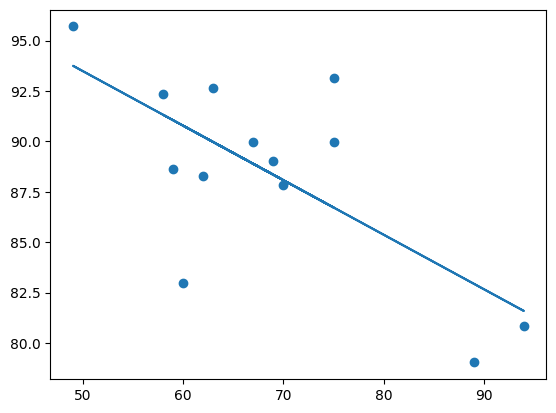

In [ ]:
HM=df["Humidity"]
T=df["Temperature"]
slope, intercept, r, p, std_err = stats.linregress(HM, T)

def myfunc(HM):
  return slope * HM + intercept

mymodel = list(map(myfunc, HM))

plt.scatter(HM, T)
plt.plot(HM, mymodel)
plt.show()


It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

This relationship - the coefficient of correlation - is called r.

The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

Python and the Scipy module will compute this value for us, all us have to do is feed it with the x-axis and y-axis values.
#Now, we are checking
 **How well does my data fit in a linear regression**

In [ ]:
HM=df["Humidity"]
T=df["Temperature"]
slope, intercept, r, p, std_err = stats.linregress(HM, T)
r

-0.6895986654854849

**The result -0.6895986654854849 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.**

#**Scatter plot visualization between Pressure(P) and Temperature(T) to check wheather it is best fit for linear regression or not.**

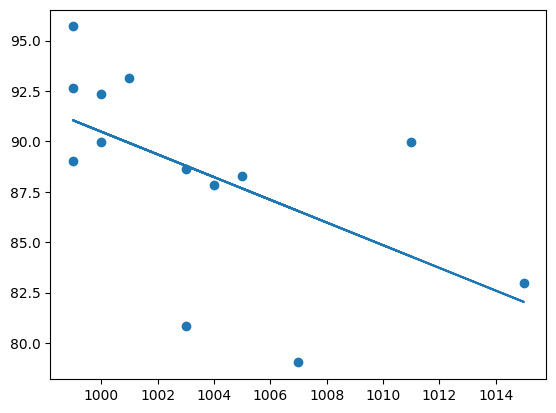

In [ ]:
P=df["Pressure"]
T=df["Temperature"]
slope, intercept, r, p, std_err = stats.linregress(P, T)

def myfunc(P):
  return slope * P + intercept

mymodel = list(map(myfunc, P))

plt.scatter(P, T)
plt.plot(P, mymodel)
plt.show()


**Now, we are checking
How well does my data fit in a linear regression**

In [ ]:
P=df["Pressure"]
T=df["Temperature"]
slope, intercept, r, p, std_err = stats.linregress(P, T)
r

-0.5685428283707521

**The text result -0.6895986654854849 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.**

#**Scatter plot visualization between wind_speed(ws) and Temperature(T) to check wheather it is best for linear regression or not.**

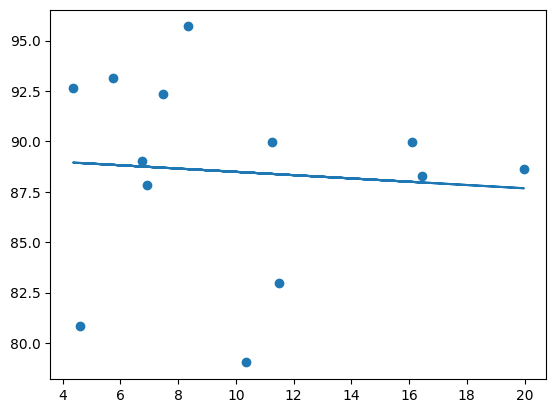

In [ ]:
ws=df["wind_speed"]
T=df["Temperature"]
slope, intercept, r, p, std_err = stats.linregress(ws, T)

def myfunc(ws):
  return slope * ws + intercept

mymodel = list(map(myfunc, ws))

plt.scatter(ws, T)
plt.plot(ws, mymodel)
plt.show()

**Now, we are checking How well does my data fit in a linear regression**

In [ ]:
ws=df["wind_speed"]
T=df["Temperature"]
slope, intercept, r, p, std_err = stats.linregress(ws, T)
r

-0.08175453867644679

**The text result -0.08175453867644679 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.**

#**Scatter plot visualization between Cloudiness(Cl) and Temperature(T) to check wheather it is best for linear regression or not.**

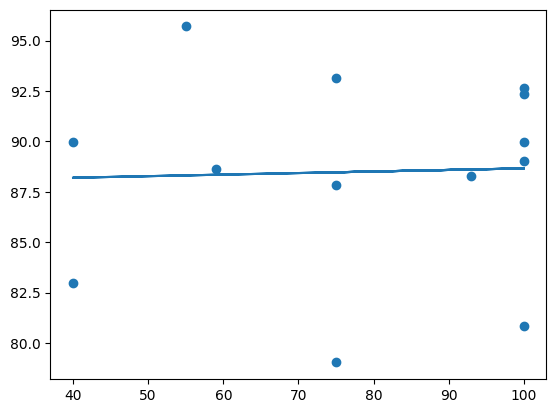

In [ ]:
Cl=df["Cloudiness"]
T=df["Temperature"]
slope, intercept, r, p, std_err = stats.linregress(Cl, T)

def myfunc(Cl):
  return slope * Cl + intercept

mymodel = list(map(myfunc, Cl))

plt.scatter(Cl, T)
plt.plot(Cl, mymodel)
plt.show()

**Now, we are checking How well does my data fit in a linear regression**

In [ ]:
Cl=df["Cloudiness"]
T=df["Temperature"]
slope, intercept, r, p, std_err = stats.linregress(Cl, T)
r

0.036428307890655626

**The bold result 0.036428307890655626 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.**

#**In regard the data cleaning aspect assuming that there is no null value ,no other factors and no incomplete data present in this data frame. further we are performing the ML algorithm.**

We use Linear Regression here,
**Linear Regression in Machine Learning analysis is important for evaluating data and establishing a definite relationship between two or more variables. Regression quantifies how the dependent variable changes as the independent variable itself take different values.**

our 'the coefficient of correlation (r) is allready satisfied the condition for Linear Regression class for all four different relationships based on the different features .

Splitted the data in X and y variables

In [ ]:
X=df.drop(['Temperature','city'],axis=1)
y=df['Temperature']

In [ ]:
X

,Humidity,Pressure,wind_speed,Cloudiness
0,67,1000,11.27,100
1,70,1004,6.91,75
2,63,999,4.36,100
3,69,999,6.76,100
4,58,1000,7.49,100
5,75,1001,5.75,75
6,60,1015,11.50,40
7,62,1005,16.46,93
8,89,1007,10.36,75
9,94,1003,4.61,100


In [ ]:
y

0     89.96
1     87.84
2     92.64
3     89.01
4     92.34
5     93.15
6     82.96
7     88.29
8     79.03
9     80.82
10    88.65
11    95.70
12    89.96
Name: Temperature, dtype: float64

#**Split Data:**
Spliting the dataset into training(80%) and testing(20%) sets. This allows us to train our model on one subset of data and evaluate its performance on another.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Creating and Training the Linear Regression Model:**
Now, creating an instance of the LinearRegression class, fitting it to the training data, and make predictions on the test data.

Using a LinearRegression model

In [ ]:
model = LinearRegression()

Training the model on the training data

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train

8     79.03
5     93.15
2     92.64
1     87.84
12    89.96
4     92.34
7     88.29
10    88.65
3     89.01
6     82.96
Name: Temperature, dtype: float64

In [ ]:
y_test

11    95.70
9     80.82
0     89.96
Name: Temperature, dtype: float64

In [ ]:
X_train

,Humidity,Pressure,wind_speed,Cloudiness
8,89,1007,10.36,75
5,75,1001,5.75,75
2,63,999,4.36,100
1,70,1004,6.91,75
12,75,1011,16.11,40
4,58,1000,7.49,100
7,62,1005,16.46,93
10,59,1003,19.98,59
3,69,999,6.76,100
6,60,1015,11.50,40


In [ ]:
X_test

,Humidity,Pressure,wind_speed,Cloudiness
11,49,999,8.34,55
9,94,1003,4.61,100
0,67,1000,11.27,100


Making predictions on the test data

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([99.54789415, 82.53787425, 89.227091  ])

#**Evaluate Model Performance:**
Calculating metrics such as Mean Squared Error (MSE) and R-squared (R2) to evaluate the performance of your model.

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6.098178963811486
R-squared: 0.837575167817189


#**Use the Model for Prediction:**
Once you're satisfied with your model's performance, you can use it to make predictions on new data:

Example new data for prediction by user input

In [ ]:
H= int(input("Humidity in percentage:"))
P=int(input("Pressure in millibars(mb):"))
ws=float(input("wind_speed in meters per second (m/s):"))
C=int(input("Cloudiness in percentage:"))

Humidity in percentage:73
Pressure in millibars(mb):1000
wind_speed in meters per second (m/s):10.5
Cloudiness in percentage:95


In [ ]:
new_test_data = np.array([[H,P,ws,C]])

Making a prediction using the trained model

In [ ]:
predicted_temperature = model.predict(new_test_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#**AI Output :**

In [ ]:
A=predicted_temperature[0]
fahrenheit=A
celsius = ((fahrenheit-32)*5)/9
Z=round(celsius,0)
print("Predicted Temperature in Celsius : ",Z)

Predicted Temperature in Celsius :  32.0
